In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression as SKLogistic
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
df = pd.read_csv('Student Depression Dataset.csv')  
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [3]:
df.isnull().sum().sort_values(ascending=False)
(df.isnull().mean()*100).round(2).sort_values(ascending=False)


Financial Stress                         0.01
id                                       0.00
Gender                                   0.00
Age                                      0.00
Profession                               0.00
City                                     0.00
Work Pressure                            0.00
CGPA                                     0.00
Study Satisfaction                       0.00
Academic Pressure                        0.00
Job Satisfaction                         0.00
Sleep Duration                           0.00
Degree                                   0.00
Dietary Habits                           0.00
Have you ever had suicidal thoughts ?    0.00
Work/Study Hours                         0.00
Family History of Mental Illness         0.00
Depression                               0.00
dtype: float64

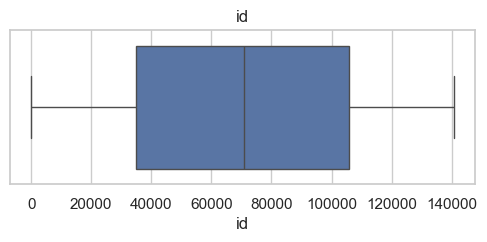

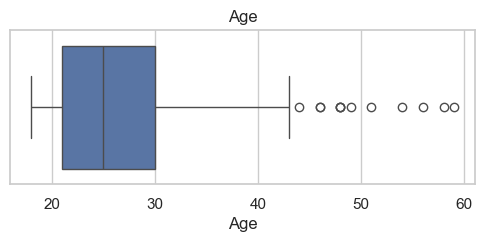

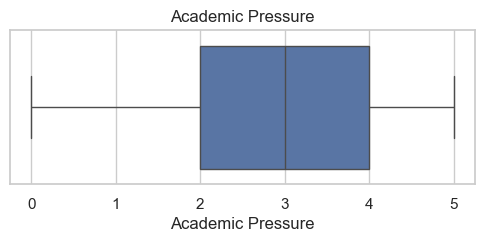

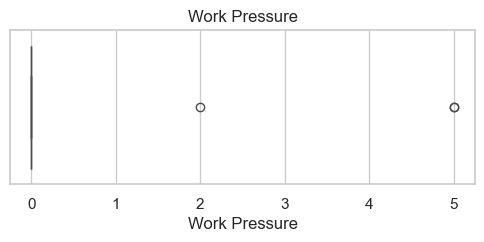

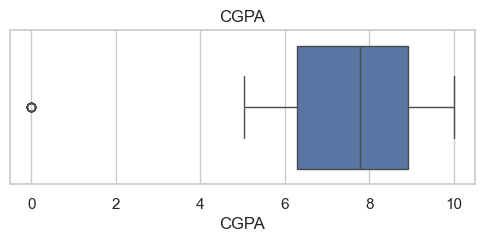

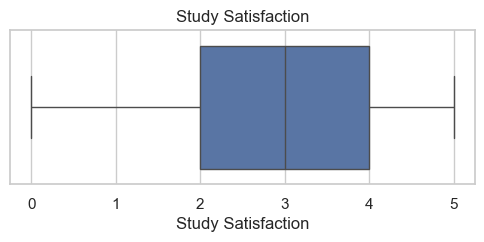

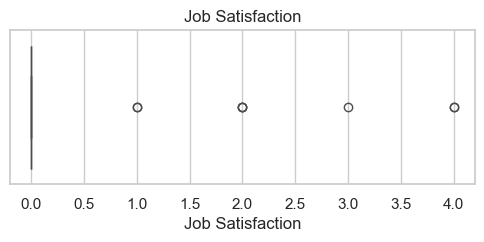

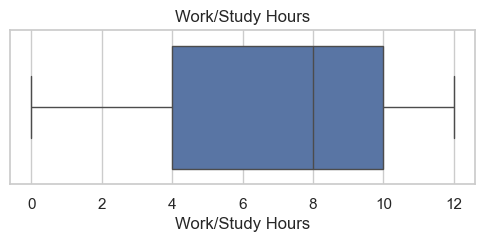

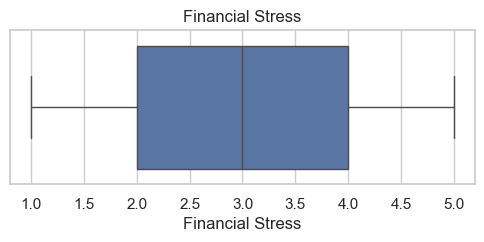

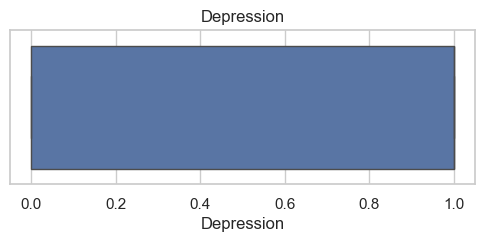

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


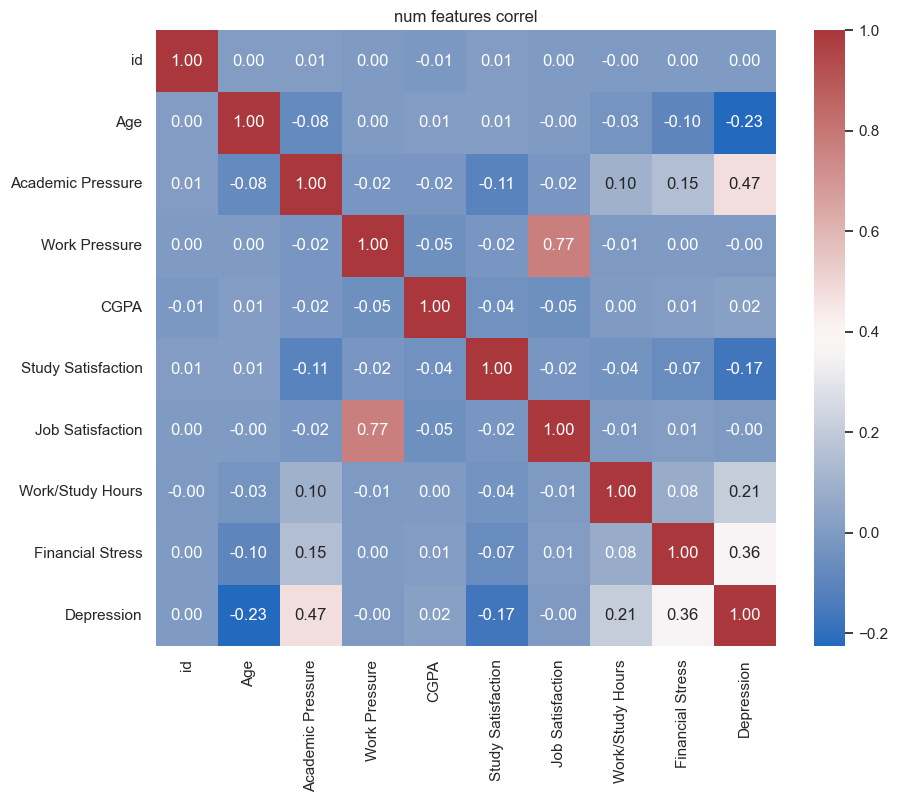

In [6]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag')
plt.title('num features correl')
plt.show()


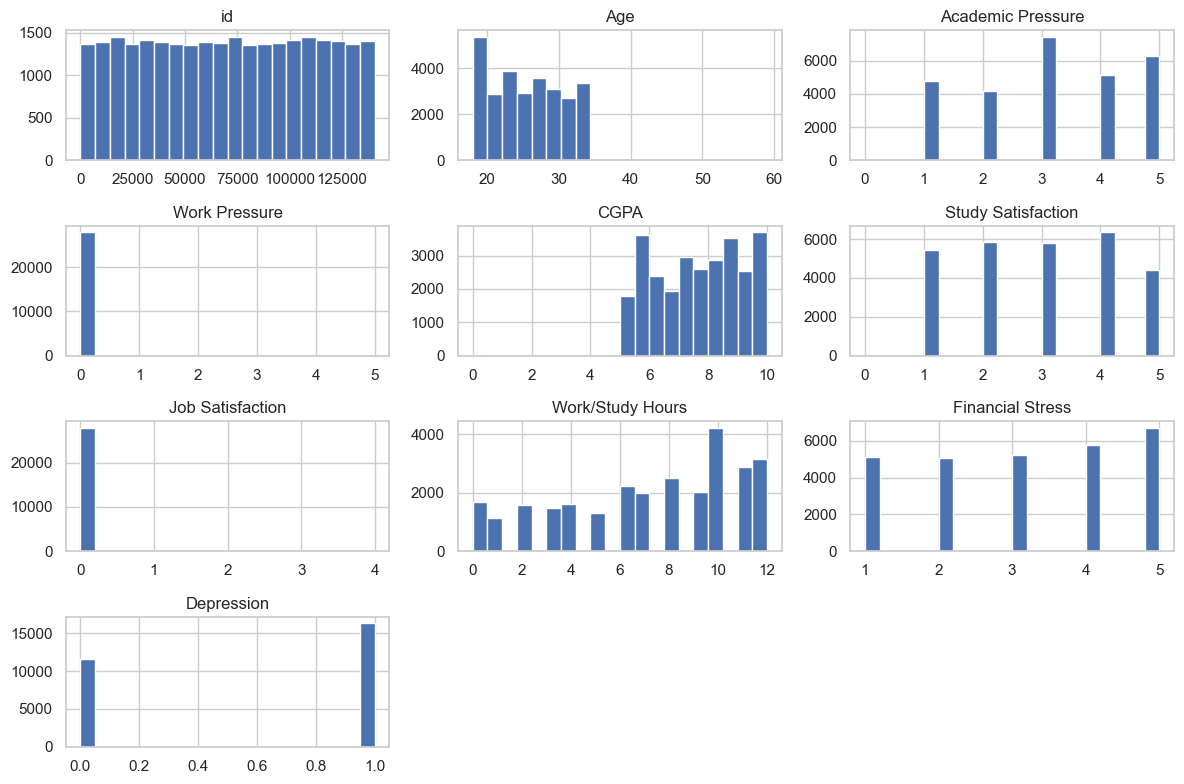

In [7]:
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()

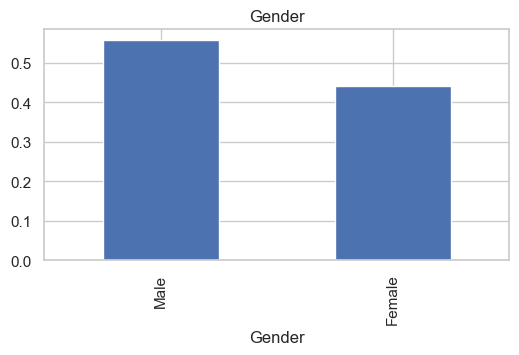

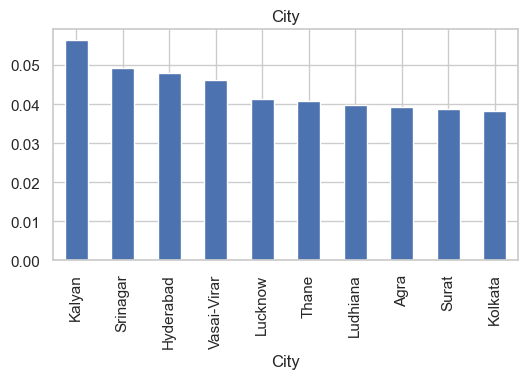

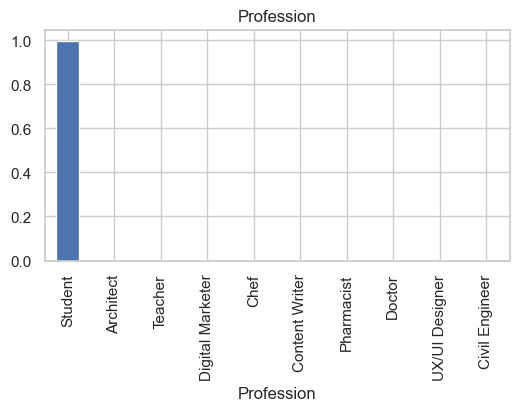

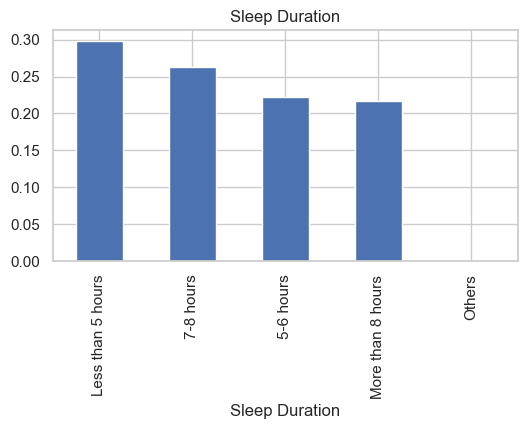

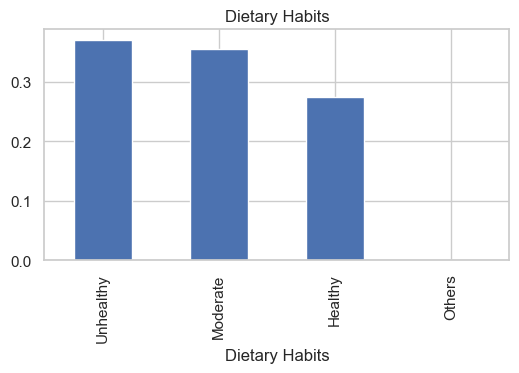

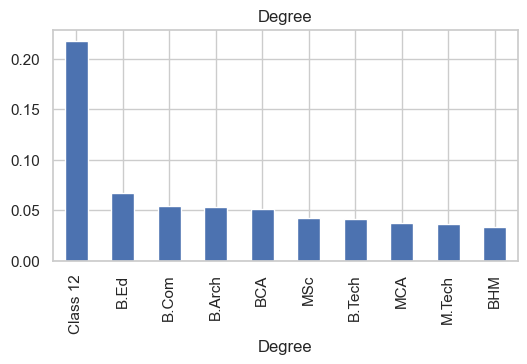

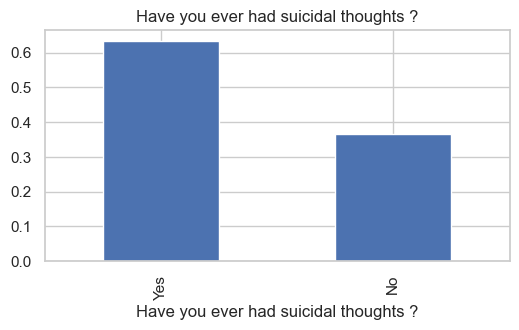

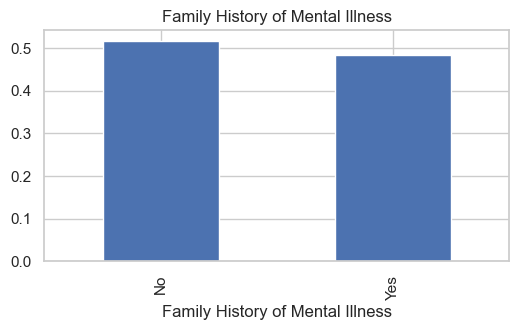

In [8]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(col)
    plt.show()


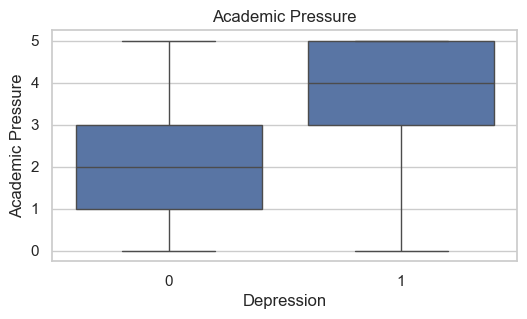

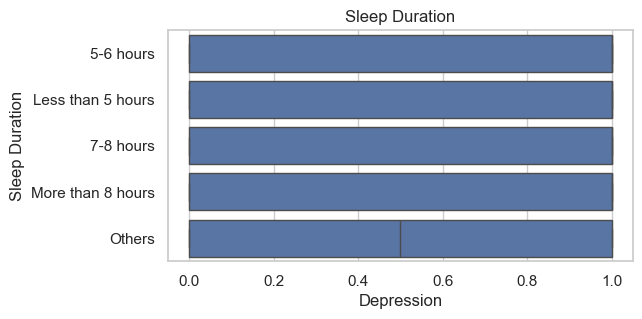

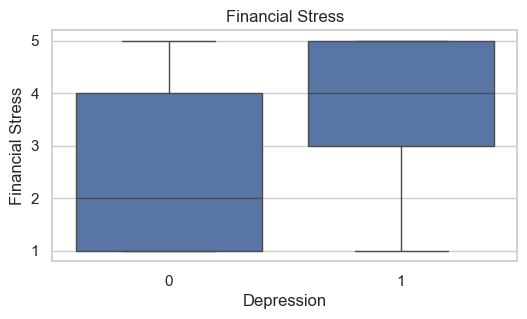

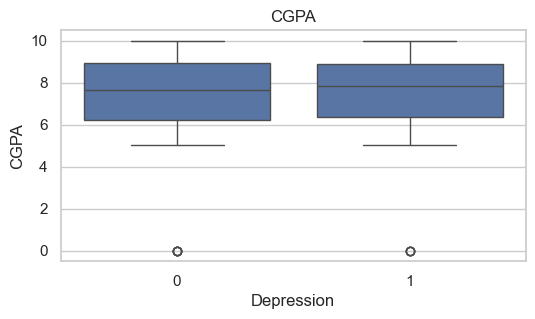

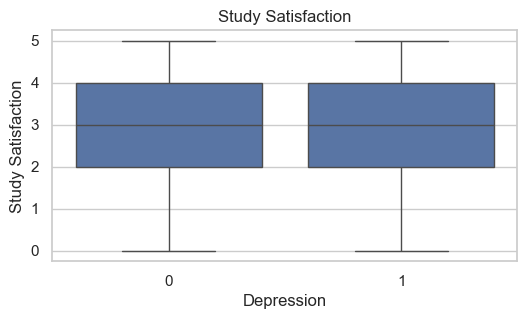

In [12]:
features_to_check = ['Academic Pressure','Sleep Duration','Financial Stress','CGPA','Study Satisfaction']
for f in features_to_check:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Depression', y=f, data=df)
    plt.title(f)
    plt.show()


In [13]:
missing = df.columns[df.isnull().any()]
missing, df[missing].isnull().sum()

num_impute = df[numeric_cols].median()
df[numeric_cols] = df[numeric_cols].fillna(num_impute)

for c in cat_cols:
    df[c] = df[c].fillna('Unknown')


In [15]:
binary_map = {'Yes':1,'No':0, 'Female':1, 'Male':0}
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_map).fillna(0).astype(int)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(binary_map).fillna(0).astype(int)
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).fillna(0).astype(int)

sleep_order = {
    'Less than 5 hours': 0, '5-6 hours': 1, '6-7 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4
}
if 'Sleep Duration' in df.columns:
    df['Sleep Duration Enc'] = df['Sleep Duration'].map(sleep_order).fillna(1).astype(int)


In [ ]:
numeric_feats = ['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress','Sleep Duration Enc']
categorical_feats = ['City','Dietary Habits','Degree'] 

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_feats),
    ('cat', categorical_transformer, categorical_feats)
])


In [18]:
class MyLogisticRegressionGD:
    def __init__(self, lr=0.01, n_iter=10000, fit_intercept=True, verbose=False, reg_lambda=0.0):
        self.lr = lr
        self.n_iter = n_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.reg_lambda = reg_lambda

    def _add_intercept(self, X):
        if self.fit_intercept:
            intercept = np.ones((X.shape[0],1))
            return np.concatenate((intercept, X), axis=1)
        return X

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X = self._add_intercept(X)
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        for i in range(self.n_iter):
            z = X.dot(self.theta)
            h = self._sigmoid(z)
            gradient = (1/n_samples) * X.T.dot(h - y)
            if self.reg_lambda > 0:
                reg = self.reg_lambda * np.r_[0, self.theta[1:]] / n_samples
                gradient += reg
            self.theta -= self.lr * gradient
            if self.verbose and i % (self.n_iter//10 + 1) == 0:
                loss = -np.mean(y*np.log(h+1e-15) + (1-y)*np.log(1-h+1e-15))
                if self.reg_lambda>0:
                    loss += (self.reg_lambda/(2*n_samples))*np.sum(self.theta[1:]**2)
                print(f'Iter {i}, loss {loss:.5f}')
        return self

    def predict_proba(self, X):
        X = np.array(X)
        X = self._add_intercept(X)
        return self._sigmoid(X.dot(self.theta))

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

    def coefficients(self):
        return self.theta


In [19]:
y = df['Depression'].astype(int)
X = df.drop(columns=['Depression', 'Sleep Duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

model = MyLogisticRegressionGD(lr=0.1, n_iter=3000, verbose=True, reg_lambda=0.1)
model.fit(X_train_prep, y_train)

y_pred = model.predict(X_test_prep)
y_proba = model.predict_proba(X_test_prep)


Iter 0, loss 0.69315
Iter 301, loss 0.43960
Iter 602, loss 0.43815
Iter 903, loss 0.43767
Iter 1204, loss 0.43737
Iter 1505, loss 0.43716
Iter 1806, loss 0.43701
Iter 2107, loss 0.43689
Iter 2408, loss 0.43680
Iter 2709, loss 0.43673


In [20]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc, prec, rec, f1

(0.7932270202472675, 0.8088836937463472, 0.847001223990208, 0.8275037369207773)

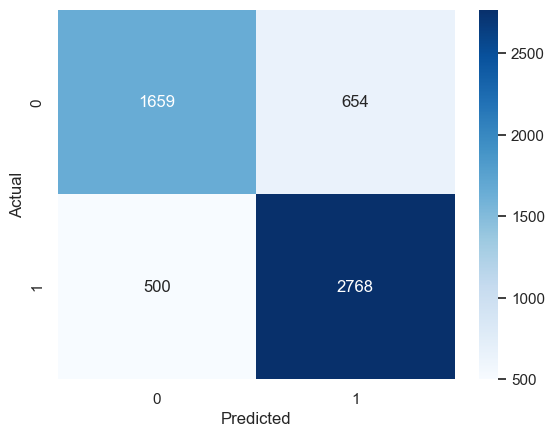

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

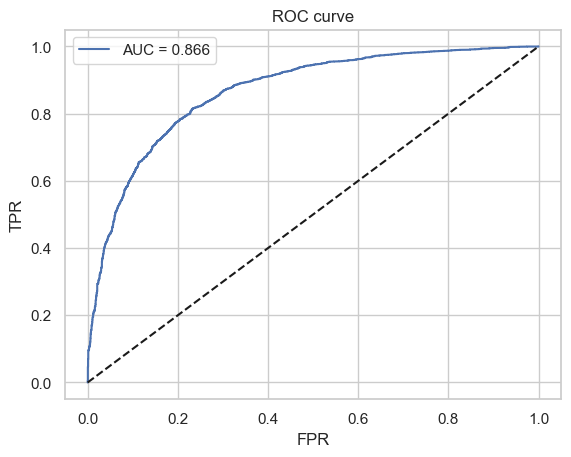

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

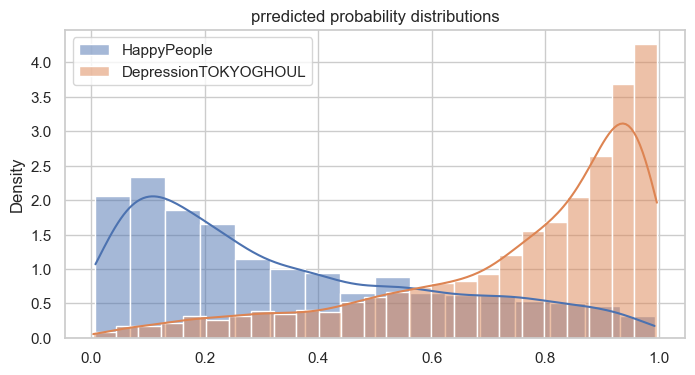

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(y_proba[y_test==0], label='HappyPeople', kde=True, stat='density')
sns.histplot(y_proba[y_test==1], label='DepressionTOKYOGHOUL', kde=True, stat='density')
plt.legend()
plt.title('prredicted probability distributions')
plt.show()

increasing the threshold -- decreasing the number of predictions -- accuracy may increase, recall decreases. so we need a compromise depending on the task (if the cost of FN is high -- the threshold is lower)

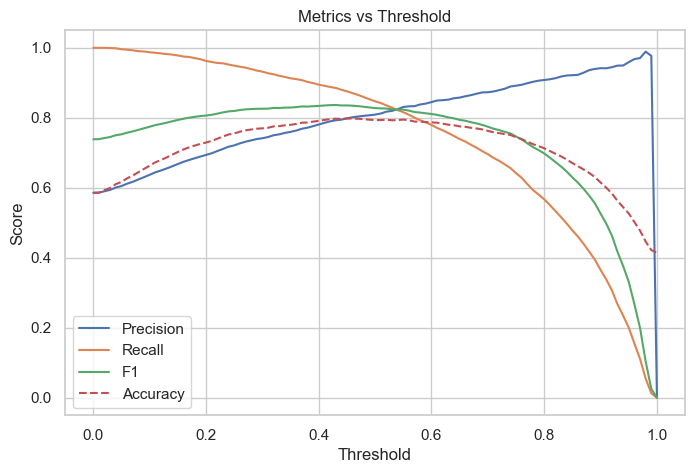

In [26]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []

for t in thresholds:
    preds_t = (y_proba >= t).astype(int)
    precision_list.append(precision_score(y_test, preds_t, zero_division=0))
    recall_list.append(recall_score(y_test, preds_t, zero_division=0))
    f1_list.append(f1_score(y_test, preds_t, zero_division=0))
    accuracy_list.append(accuracy_score(y_test, preds_t))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1')
plt.plot(thresholds, accuracy_list, label='Accuracy', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Metrics vs Threshold')
plt.show()


6.3 Description of trends

Precision grows as the threshold increases
Recall is falling
F1 has a maximum in the middle somewhere - it's a compromise
Accuracy can have a "plateau" if the classes are unbalanced

6.4 Method for determining the optimal threshold

Or minimize financial loss either maximize F1

7. TP cost $500: if the model correctly identified depression and you paid for treatment, this is a real fee for treatment/diagnosis; we consider this a rational cost.

FP cost $1,000: a healthy student was mistakenly sent to the hospital — money and resources were wasted (and possible damage to reputation).

TN cost $0: if you didn't send it correctly, there are no costs.

FN cost $5,000: depression was not detected — high risk of deterioration, possible hospitalization, loss, responsibility — high cost.

TN is low because lack of action usually does not require direct spending.

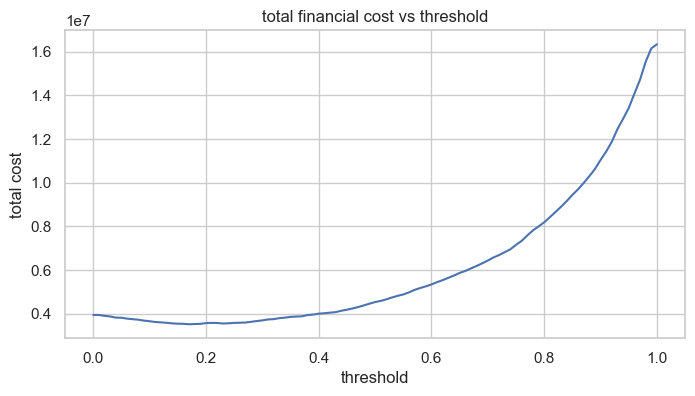

(np.float64(0.17), np.int64(3523000))

In [27]:
cost_TP = 500
cost_FP = 1000
cost_TN = 0
cost_FN = 5000

total_costs = []
for t in thresholds:
    preds_t = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds_t).ravel()
    total = tp*cost_TP + fp*cost_FP + tn*cost_TN + fn*cost_FN
    total_costs.append(total)

plt.figure(figsize=(8,4))
plt.plot(thresholds, total_costs)
plt.xlabel('threshold')
plt.ylabel('total cost')
plt.title('total financial cost vs threshold')
plt.show()

min_idx = np.argmin(total_costs)
min_threshold = thresholds[min_idx]
min_cost = total_costs[min_idx]
min_threshold, min_cost


8.1 What are the hyperparameters of logregression

C (inverse regularization) is the strength of regularization; small C - strong regularization.

penalty — the type of regularization (l1, l2, elasticnet, none).

solver is an optimization method.

max_iter — the maximum number of iterations.

class_weight — accounting for unbalanced classes.

tol is the stop criterion.

In [28]:
pipe = Pipeline(steps=[('pre', preprocessor),
                       ('clf', SKLogistic(solver='liblinear', max_iter=1000))])

param_grid = {
    'clf__penalty': ['l1','l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("best params:", grid.best_params_)
print("best CV F1:", grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
best params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l1'}
best CV F1: 0.8312377821593431


In [29]:
best_model = grid.best_estimator_
y_test_proba_best = best_model.predict_proba(X_test)[:,1]
y_test_pred_best = (y_test_proba_best >= 0.5).astype(int)
print('test F1:', f1_score(y_test, y_test_pred_best))


test F1: 0.8277511961722488


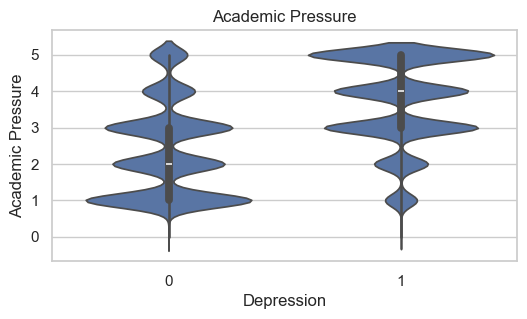

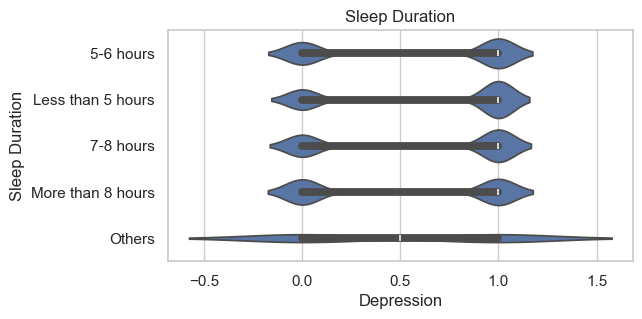

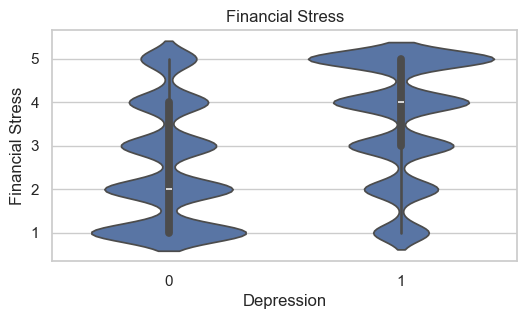

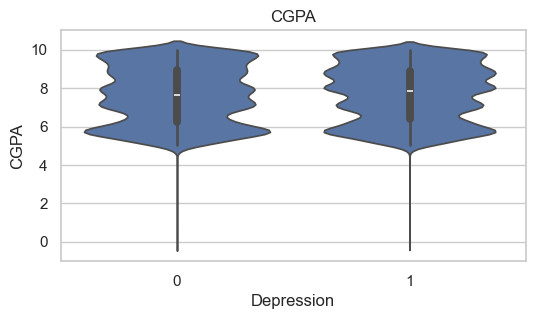

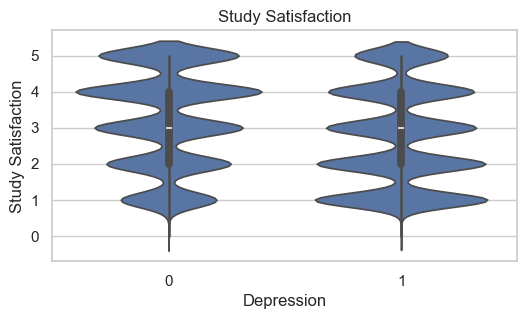

In [30]:
for f in features_to_check:
    plt.figure(figsize=(6,3))
    sns.violinplot(x='Depression', y=f, data=df)
    plt.title(f)
    plt.show()


In [31]:
ohe = best_model.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
ohe_features = ohe.get_feature_names_out(categorical_feats)
feature_names = numeric_feats + list(ohe_features)

coefs = best_model.named_steps['clf'].coef_.flatten()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
coef_df.head(10)


,feature,coef,abs_coef
1,Academic Pressure,1.187019,1.187019
7,Financial Stress,0.831095,0.831095
0,Age,-0.583713,0.583713
59,Dietary Habits_Unhealthy,0.574398,0.574398
56,Dietary Habits_Healthy,-0.508484,0.508484
58,Dietary Habits_Others,0.452233,0.452233
6,Work/Study Hours,0.443185,0.443185
39,City_Mumbai,-0.366720,0.366720
4,Study Satisfaction,-0.301758,0.301758
40,City_Nagpur,-0.287711,0.287711


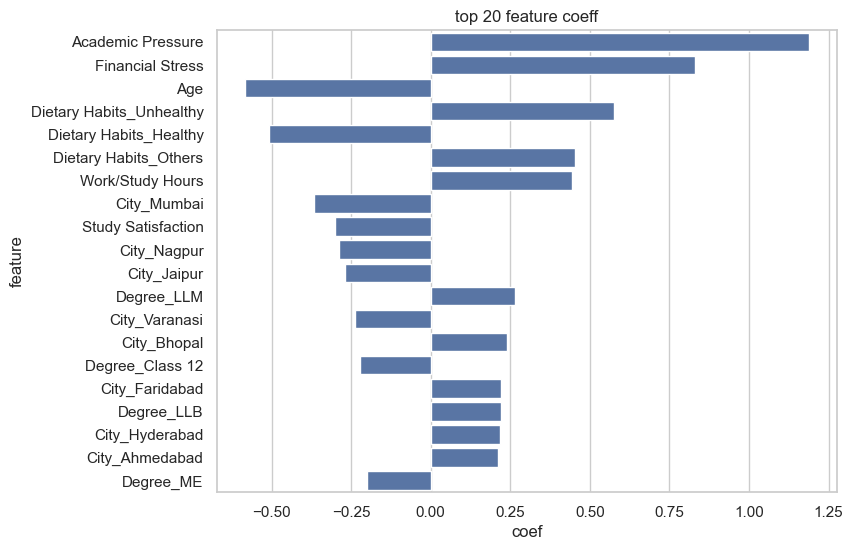

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x='coef', y='feature', data=coef_df.head(20))
plt.title('top 20 feature coeff')
plt.show()

9.3 Interpretation

A positive coefficient -- an increase in the value of the feature increases the chance of predicting depression/

Negative -- reduces the chance

In [33]:
test_df = X_test.copy()
test_df['y_true'] = y_test.values
test_df['y_proba'] = y_test_proba_best
test_df['y_pred'] = y_test_pred_best

FP = test_df[(test_df['y_true']==0) & (test_df['y_pred']==1)]
FN = test_df[(test_df['y_true']==1) & (test_df['y_pred']==0)]

FP.head()
FN.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Sleep Duration Enc,y_true,y_proba,y_pred
12229,61773,0,29.0,Kanpur,Student,3.0,0.0,6.63,2.0,0.0,Moderate,B.Com,1,6.0,1.0,0,3,1,0.223217,0
22701,114474,0,28.0,Meerut,Student,3.0,0.0,7.10,1.0,0.0,Moderate,Class 12,1,1.0,2.0,0,1,1,0.297728,0
24786,124890,1,20.0,Pune,Student,4.0,0.0,6.16,5.0,0.0,Healthy,Class 12,0,0.0,3.0,1,3,1,0.392961,0
18526,93821,0,24.0,Hyderabad,Student,3.0,0.0,7.10,2.0,0.0,Unhealthy,M.Pharm,1,0.0,1.0,0,4,1,0.328575,0
1319,6819,0,20.0,Vadodara,Student,2.0,0.0,6.99,3.0,0.0,Unhealthy,Class 12,0,6.0,3.0,1,4,1,0.496181,0
